In [1]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
image= PIL.Image.open("C:/Users/shrey/Desktop/jupyter/pneumonia detection model/train/PNEUMONIA/person7_bacteria_28.jpeg")

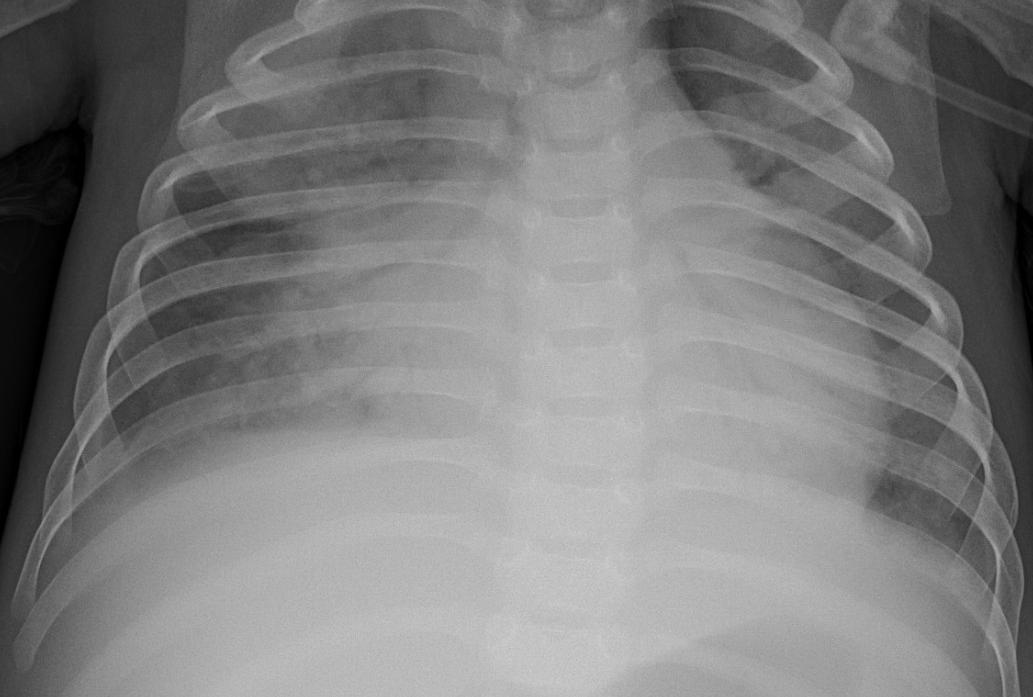

In [3]:
image

In [4]:
import os
import shutil

base_dir = "C:/Users/shrey/Desktop/jupyter/pneumonia detection model"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# Move all validation images back to train
for class_name in ["NORMAL", "PNEUMONIA"]:
    val_class_dir = os.path.join(val_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    
    for img in os.listdir(val_class_dir):
        shutil.move(
            os.path.join(val_class_dir, img),
            os.path.join(train_class_dir, img)
        )

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)  # For reproducibility

for class_name in ["NORMAL", "PNEUMONIA"]:
    class_dir = os.path.join(train_dir, class_name)
    images = [f for f in os.listdir(class_dir) if f.endswith(('.jpeg', '.jpg', '.png'))]
    
    # Split with EXACT 80/20 ratio
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)
    
    # Creating validation dirs
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    
    # Moving only 20% to validation
    for img in val_imgs:
        shutil.move(
            os.path.join(class_dir, img),
            os.path.join(val_dir, class_name, img)
        )

# Verifying
def count_images(path):
    return sum(len(files) for _, _, files in os.walk(path))

print(f"Training images: {count_images(train_dir)}")
print(f"Validation images: {count_images(val_dir)}")
print(f"Ratio: {count_images(val_dir) / (count_images(train_dir) + count_images(val_dir)):.1%}")

Training images: 4186
Validation images: 1047
Ratio: 20.0%


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_generator= ImageDataGenerator(rescale=1/255)
data_train= train_generator.flow_from_directory(train_dir, target_size=(120,120), class_mode='binary')

Found 4185 images belonging to 2 classes.


In [8]:
validation_generator= ImageDataGenerator(rescale=1/255)
data_valid= validation_generator.flow_from_directory(val_dir, target_size=(120,120), class_mode='binary')

Found 1047 images belonging to 2 classes.


In [9]:
test_dir= "C:/Users/shrey/Desktop/jupyter/pneumonia detection model/test"
test_generator= ImageDataGenerator(rescale=1/255)
data_test= validation_generator.flow_from_directory(test_dir, target_size=(120,120), class_mode='binary')

Found 624 images belonging to 2 classes.


In [10]:
model= tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(512, (3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256, activation= "relu"),
                           tf.keras.layers.Dense(1, activation="sigmoid")])

C:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 118, 118, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 57, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",                          # Overall correctness
        ]
)

In [ ]:
history = model.fit(
    data_train,
    epochs=10,
    validation_data=data_valid,
    
)

Epoch 1/10


C:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 7730s 59s/step - accuracy: 0.7466 - loss: 0.5856 - val_accuracy: 0.8949 - val_loss: 0.2509
Epoch 2/10
 27/131 ━━━━━━━━━━━━━━━━━━━━ 4:10:56 145s/step - accuracy: 0.8766 - loss: 0.2814

In [14]:
model.evaluate(data_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 435ms/step - accuracy: 0.7213 - loss: 1.5449


[1.5495821237564087, 0.7387820482254028]

In [15]:
predictions= model.predict(data_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 322ms/step


In [16]:
predictions

array([[9.6047264e-01],
       [1.0000000e+00],
       [9.9999416e-01],
       [8.4543586e-02],
       [9.0776139e-01],
       [9.9287248e-01],
       [1.0000000e+00],
       [9.9999642e-01],
       [8.8411462e-01],
       [6.4761126e-01],
       [9.9999660e-01],
       [1.0000000e+00],
       [9.9988914e-01],
       [9.9999958e-01],
       [9.9604815e-01],
       [1.0000000e+00],
       [9.9999893e-01],
       [2.1365708e-02],
       [9.9999380e-01],
       [9.9990171e-01],
       [9.9966145e-01],
       [9.8890448e-01],
       [9.9999273e-01],
       [9.9999970e-01],
       [9.9991232e-01],
       [1.0000000e+00],
       [9.9986756e-01],
       [9.9999583e-01],
       [9.9999869e-01],
       [4.4935322e-03],
       [9.9999803e-01],
       [9.8417044e-01],
       [1.9689483e-05],
       [9.4049805e-01],
       [9.9775505e-01],
       [9.9746615e-01],
       [1.0000000e+00],
       [5.2429855e-01],
       [9.9999994e-01],
       [6.6734815e-01],
       [9.9949050e-01],
       [9.999988